# UNAD
## Predicción de enfermedades cardiacas con Regresión Logística

## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [5]:
# Se cargan las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Librerias necesarias para realizar la ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
# Lectura y almacenamiento del archivo a trabajar
Datos = pd.read_csv('./Analisis_Datos/Dataset_Regresion_Logistica/heart_cleveland_upload.csv')

In [9]:
# Se realiza lectura del archivo para el análisis exploratorio
Datos.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [11]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos (cp)')

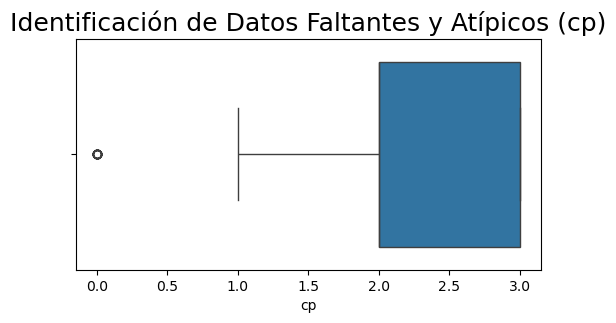

In [13]:
# Identificación de datos faltantes y atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificación de Datos Faltantes y Atípicos (cp)', fontsize=18)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos (restecg)')

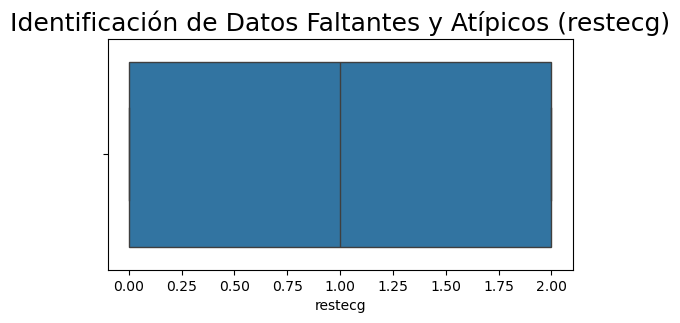

In [15]:
# Identificación de datos faltantes y atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['restecg'])
plt.title('Identificación de Datos Faltantes y Atípicos (restecg)', fontsize=18)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos (oldpeak)')

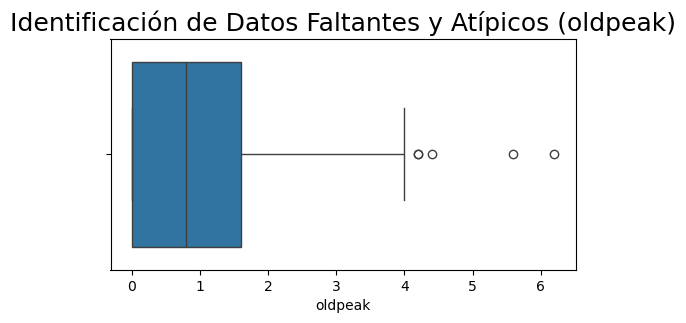

In [17]:
# Identificación de datos faltantes y atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos (oldpeak)', fontsize=18)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos (ca)')

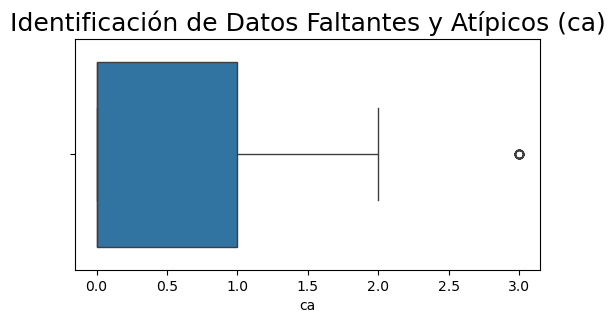

In [19]:
# Identificación de datos faltantes y atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['ca'])
plt.title('Identificación de Datos Faltantes y Atípicos (ca)', fontsize=18)

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [22]:
# Revisión de datos faltantes
print("Cantidad de registros con presión arterial en valor cero: ", Datos['trestbps'].isin([0]).sum())
print("Cantidad de registros con colesterorl en valor cero: ", Datos['chol'].isin([0]).sum())
print("Cantidad de registros con frecuencia cardiaca maxima en valor cero: ", Datos['thalach'].isin([0]).sum())

Cantidad de registros con presión arterial en valor cero:  0
Cantidad de registros con colesterorl en valor cero:  0
Cantidad de registros con frecuencia cardiaca maxima en valor cero:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos en la Presión Arterial')

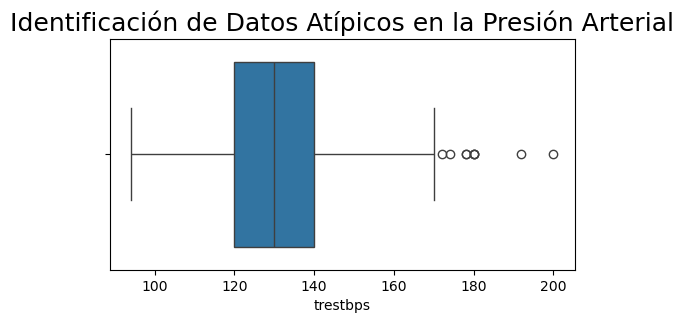

In [24]:
# Identificación de valores atipicos en trestbps
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Atípicos en la Presión Arterial', fontsize=18)

In [26]:
# Conteo de Datos Atípicos
nivel_minimo_trestbps=100
nivel_maximo_trestbps=170
Total_Atipicos_trestbps=((Datos['trestbps']<nivel_minimo_trestbps)|(Datos['trestbps']>nivel_maximo_trestbps)).sum()
print("El total de datos atípicos de trestbps es {}".format(Total_Atipicos_trestbps))

El total de datos atípicos de trestbps es 11


In [28]:
# Filtro de Datos Atípicos
Datos=Datos[(Datos['trestbps']<nivel_maximo_trestbps)&(Datos['trestbps']>nivel_minimo_trestbps)]

# Validación datos
Total_Atipicos_trestbps=((Datos['trestbps']<nivel_minimo_trestbps)|(Datos['trestbps']>nivel_maximo_trestbps)).sum()
print("El total de datos atípicos de trestbps es {}".format(Total_Atipicos_trestbps))

El total de datos atípicos de trestbps es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos en el Colesterol')

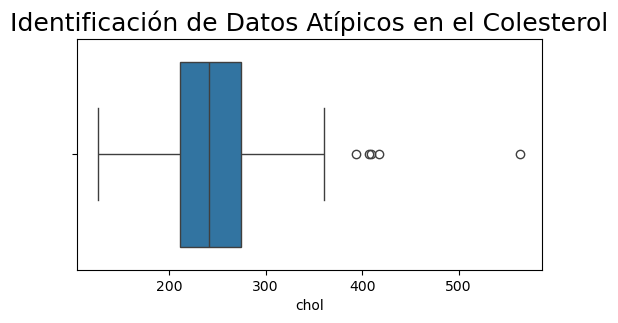

In [30]:
# Identificación de valores atipicos en chol 
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Atípicos en el Colesterol', fontsize=18)

In [32]:
# Conteo de Datos Atípicos
nivel_maximo_chol=350
Total_Atipicos_chol=((Datos['chol']>nivel_maximo_chol)).sum()
print("El total de datos atípicos de chol es {}".format(Total_Atipicos_chol))

El total de datos atípicos de chol es 8


In [34]:
# Filtro de Datos Atípicos
Datos=Datos[(Datos['chol']<nivel_maximo_chol)]

# Validación datos
Total_Atipicos_chol=((Datos['chol']>nivel_maximo_chol)).sum()
print("El total de datos atípicos de chol es {}".format(Total_Atipicos_chol))

El total de datos atípicos de chol es 0


In [36]:
# Revisión  del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        270 non-null    int64  
 1   sex        270 non-null    int64  
 2   cp         270 non-null    int64  
 3   trestbps   270 non-null    int64  
 4   chol       270 non-null    int64  
 5   fbs        270 non-null    int64  
 6   restecg    270 non-null    int64  
 7   thalach    270 non-null    int64  
 8   exang      270 non-null    int64  
 9   oldpeak    270 non-null    float64
 10  slope      270 non-null    int64  
 11  ca         270 non-null    int64  
 12  thal       270 non-null    int64  
 13  condition  270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.6 KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

Característica de interes:

- condition: si la persona tiene enfermedad cardiaca o no (0 = no tiene enfermedad cardiaca - 1 = si tiene enfermedad cardiaca)
- Predecir si una persona puede tener una enfermedad cardiaca

In [39]:
# Total de personas con una enfermedad cardiaca
Datos['condition'].value_counts()

condition
0    147
1    123
Name: count, dtype: int64

In [41]:
Datos[['condition']].head(30)

,condition
0,0
1,0
2,0
3,1
4,0
6,0
7,1
8,0
11,1
12,1


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 

In [44]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [46]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
131   48    1   2       124   255    1        0      175      0      0.0   
255   52    1   3       128   255    0        0      161      1      0.0   
171   65    1   3       135   254    0        2      127      0      2.8   
205   60    0   3       158   305    0        2      161      0      0.0   
258   52    1   3       125   212    0        0      168      0      1.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
110   54    0   2       135   304    1        0      170      0      0.0   
192   61    1   3       120   260    0        0      140      1      3.6   
2     66    0   0       150   226    0        0      114      0      2.6   
108   54    1   2       120   258    0        2      147      0      0.4   
70    34    0   1       118   210    0        0      192      0      0.7   

     slope  ca  thal  
131      0   2     0  
255      0   1     2  
171      1   1    

In [48]:
print (Y_train)

131    0
255    1
171    1
205    1
258    1
      ..
110    0
192    1
2      0
108    0
70     0
Name: condition, Length: 202, dtype: int64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros. 

In [51]:
# Construir el modelo de regresión logística 
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)   

# Se crea el modelo de predicción
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [53]:
print (Y_test)

221    1
295    0
276    0
126    1
23     0
      ..
227    0
268    0
257    1
265    0
145    0
Name: condition, Length: 68, dtype: int64


In [55]:
print (Prediccion)

[1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

In [58]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.83      0.81      0.82        31

    accuracy                           0.84        68
   macro avg       0.84      0.84      0.84        68
weighted avg       0.84      0.84      0.84        68



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

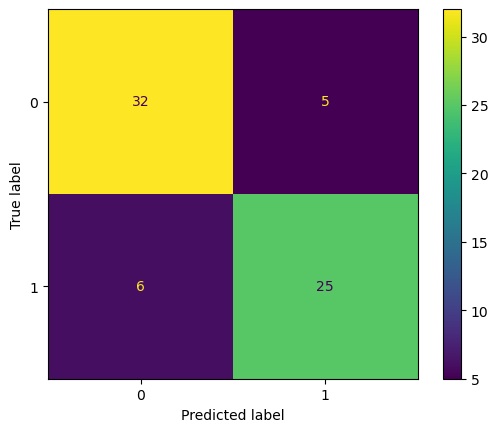

In [61]:
#Matrix de Confusión del modelo
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

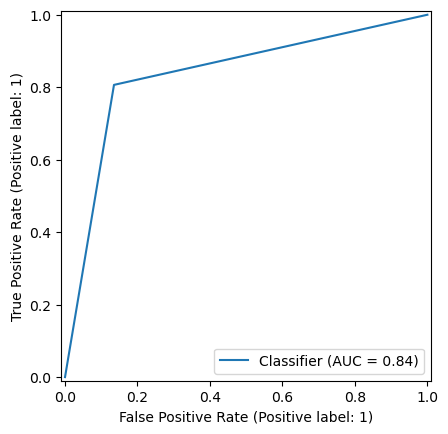

In [63]:
# Curva de precisón del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos
Del desempeño del modelo se puede describir:

- Precisión: Aquí la precisión para la clase "condition" es 0,83, lo que significa que el 84% de las precicciones como personas con enfermedad cardiaca  por el modelo eran en realidad personas con dicha condición.

- Recall: Aquí el Recall para la clase "condition" es 0,81, lo que indica que el modelo identificó correctamente al 81% de todos las personas con enfermedades cardiacas.

- F1 Score: Aquí la puntuación F1 para la clase "condition" es 0,82, lo que indica un equilibrio entre precisión y recuerdo.

De la Matriz de Confusión podemos interpretar:

* Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 32

* Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 25

* Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 5

* Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 6

De la curva de precisión del modelo se puede interpretar:

* El AUC es 0,84 lo que significa que el 84 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.